# CLV : Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Marketing-Customer-Value-Analysis.csv")

C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\vrnsi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
df=df.drop(columns=['Customer'])


In [6]:
df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Count'>

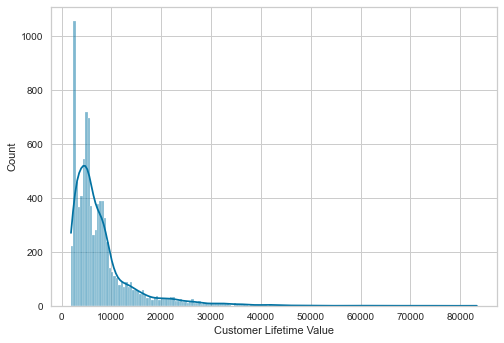

In [86]:
fig= figsize=(20, 20)
sns.histplot(data=df, x="Customer Lifetime Value", kde=True)

<AxesSubplot:>

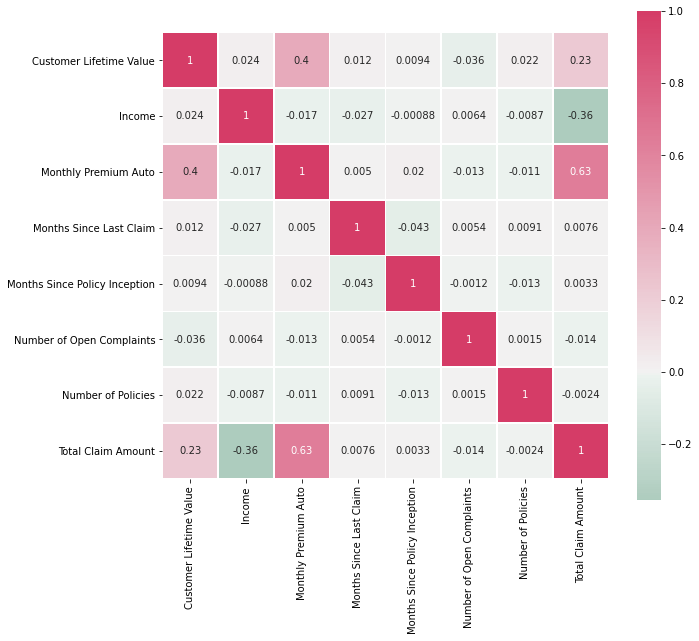

In [9]:
f, ax = plt.subplots(figsize=(10, 10))
import seaborn as sns
corr_mat = df.corr()
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr_mat, square = True, cmap = cmap, annot =True, vmax=None, center=0, linewidths=.5, cbar_kws={"shrink": .9})

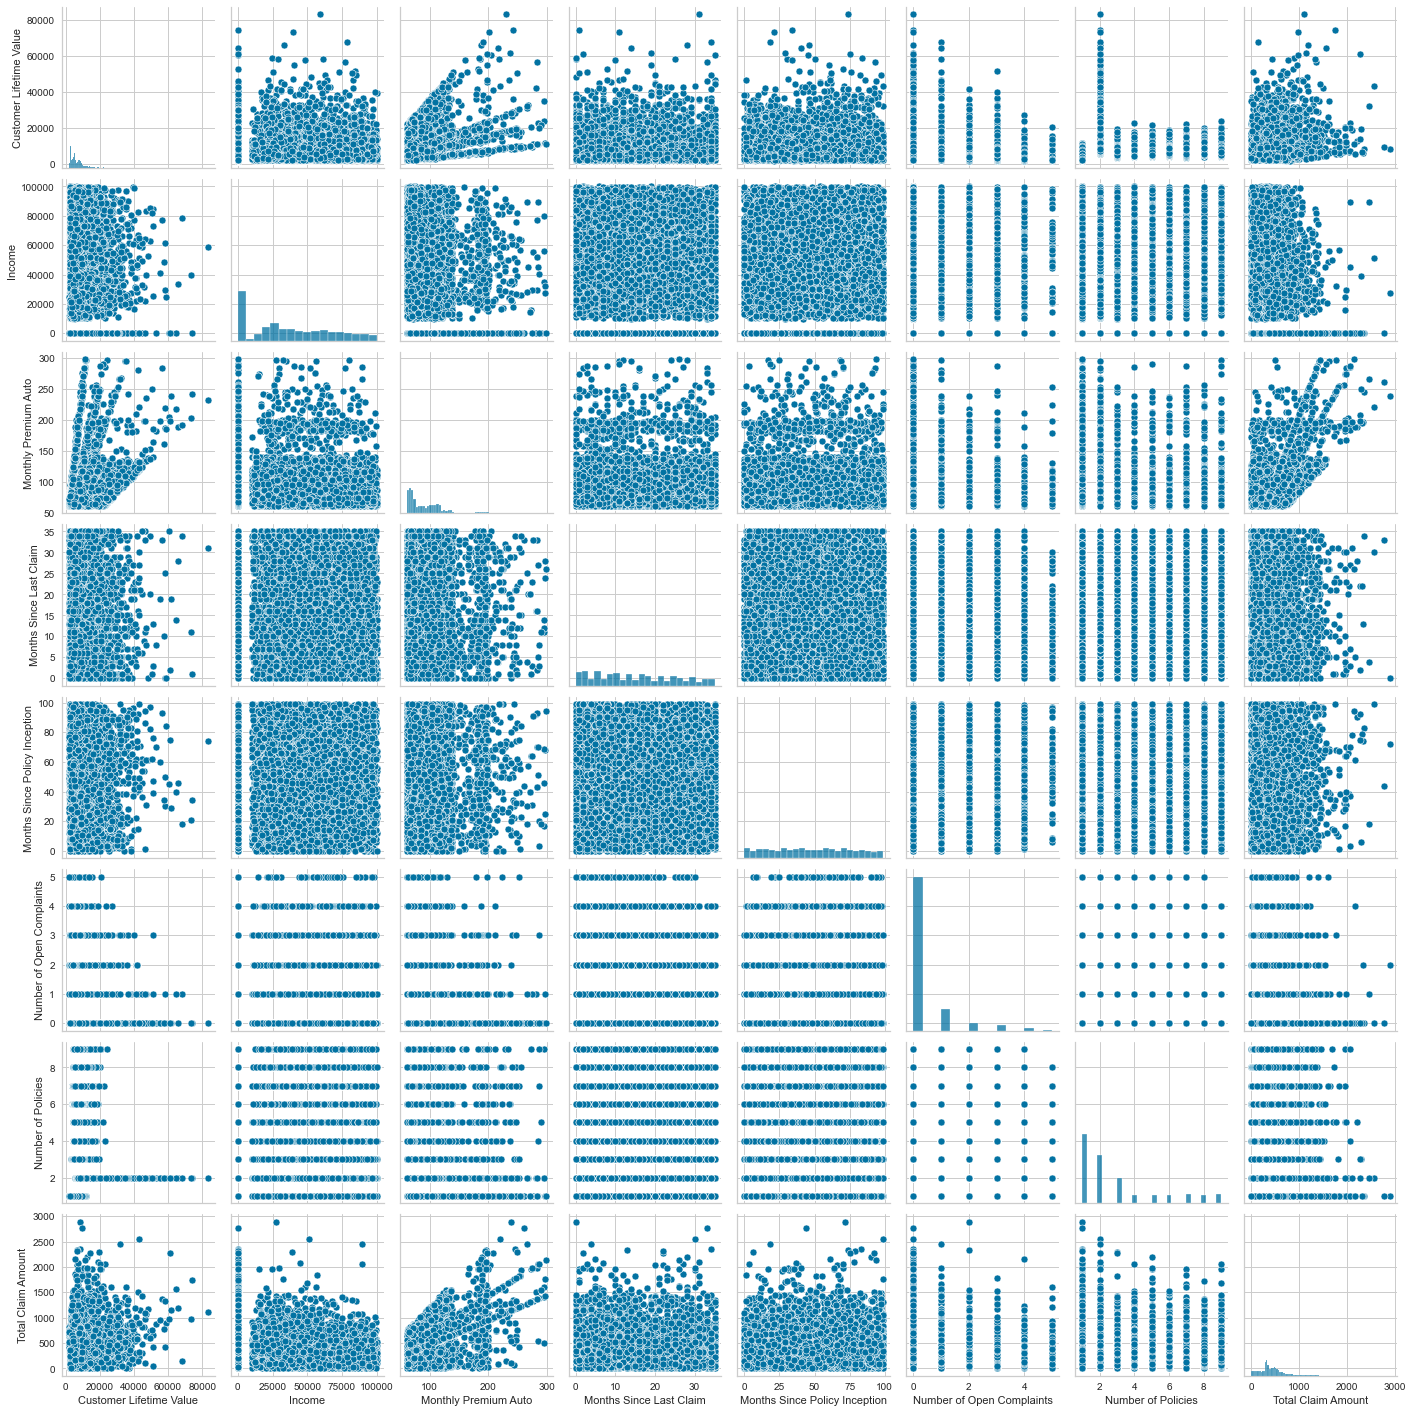

In [88]:
sns.pairplot(data=df, palette= (["#682F2F","#F3AB60"]))
plt.show()

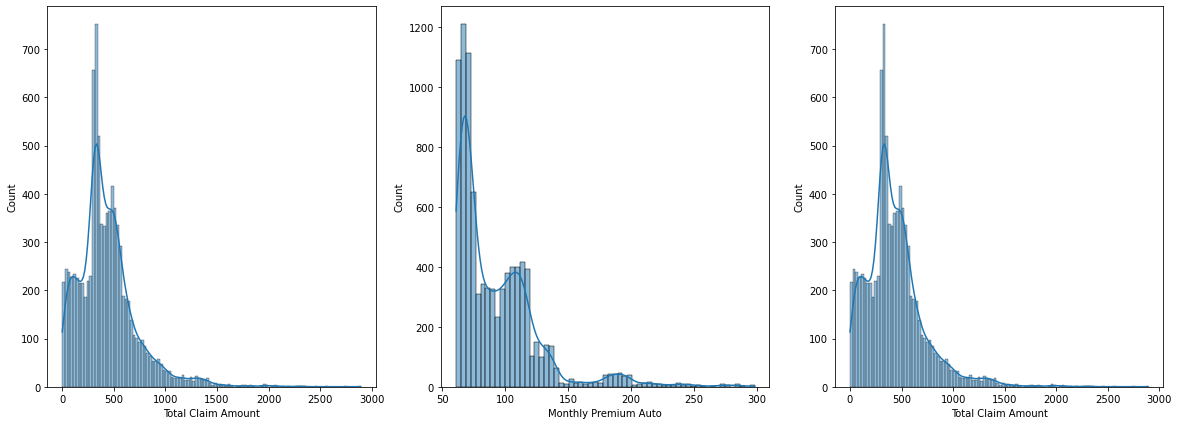

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data=df, x="Total Claim Amount", kde=True, ax=axs[0])
sns.histplot(data=df, x="Monthly Premium Auto", kde=True, ax=axs[1])
sns.histplot(data=df, x= "Total Claim Amount", kde=True, ax=axs[2])

plt.show()

# Statistical table for all parameters

In [12]:
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


# Inferential Statistics

## Coverage

In [13]:
df_agg = df.groupby('Coverage', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Coverage,Customer Lifetime Value
0,Basic,4.003785e+07
1,Extended,2.410130e+07
2,Premium,8.977977e+06


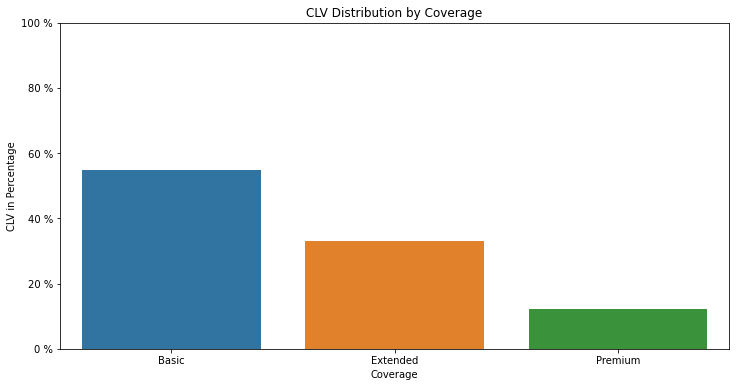

In [14]:
import matplotlib.ticker as mticker

agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Coverage', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Coverage')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Coverage')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## Education

In [15]:
df_agg = df.groupby('Education', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Education,Customer Lifetime Value
0,Bachelor,2.163407e+07
1,College,2.104870e+07
2,Doctor,2.571958e+06
3,High School or Below,2.175397e+07
4,Master,6.108422e+06


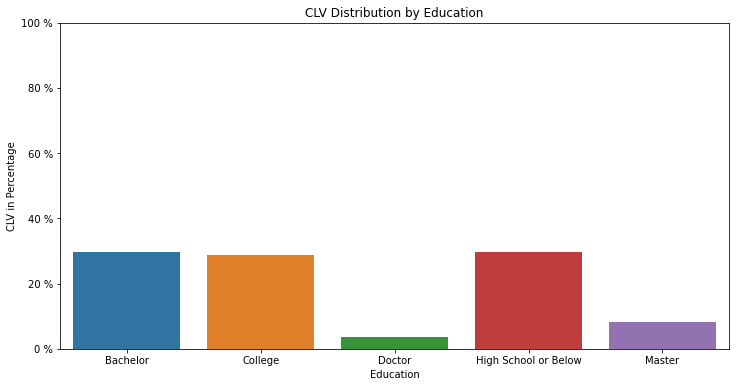

In [16]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Education', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Education')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Education')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## Emplyment Status

In [17]:
df_agg = df.groupby('EmploymentStatus', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,EmploymentStatus,Customer Lifetime Value
0,Disabled,3.178395e+06
1,Employed,4.683253e+07
2,Medical Leave,3.301267e+06
3,Retired,2.111578e+06
4,Unemployed,1.769335e+07


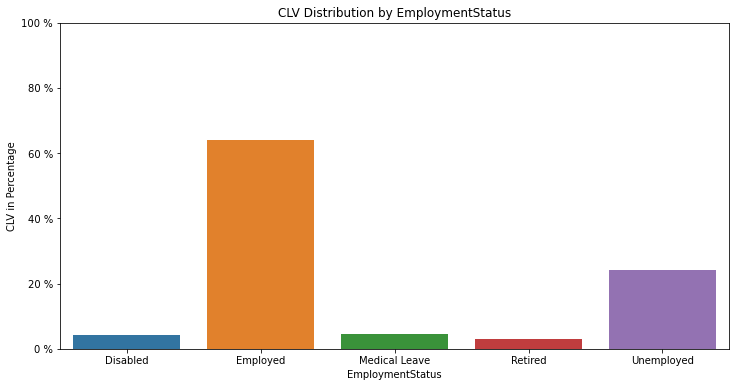

In [18]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='EmploymentStatus', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('EmploymentStatus')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by EmploymentStatus')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## Gender

In [19]:
df_agg = df.groupby('Gender', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Gender,Customer Lifetime Value
0,F,3.771397e+07
1,M,3.540315e+07


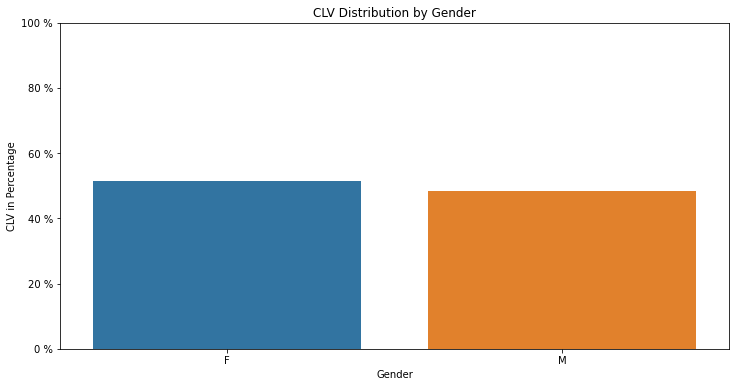

In [20]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Gender', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Gender')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Gender')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## Location

In [21]:
df_agg = df.groupby('Location Code', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Location Code,Customer Lifetime Value
0,Rural,1.410191e+07
1,Suburban,4.625776e+07
2,Urban,1.275746e+07


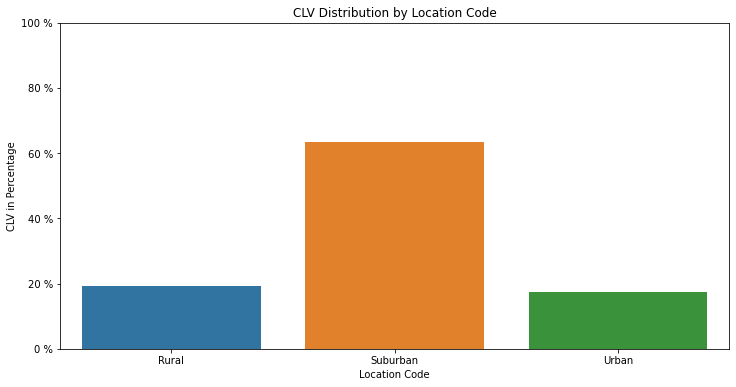

In [22]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Location Code', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Location Code')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Location Code')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## Martial status

In [23]:
df_agg = df.groupby('Marital Status', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Marital Status,Customer Lifetime Value
0,Divorced,1.128226e+07
1,Married,4.280237e+07
2,Single,1.903250e+07


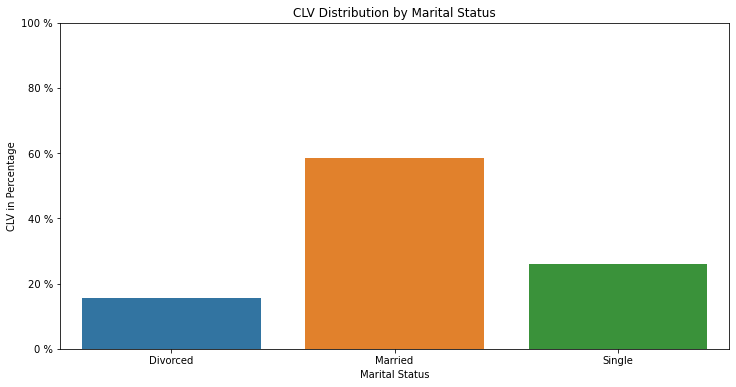

In [24]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Marital Status', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Marital Status')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Marital Status')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## Policy type

In [25]:
df_agg = df.groupby('Policy Type', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Policy Type,Customer Lifetime Value
0,Corporate Auto,1.537876e+07
1,Personal Auto,5.448974e+07
2,Special Auto,3.248625e+06


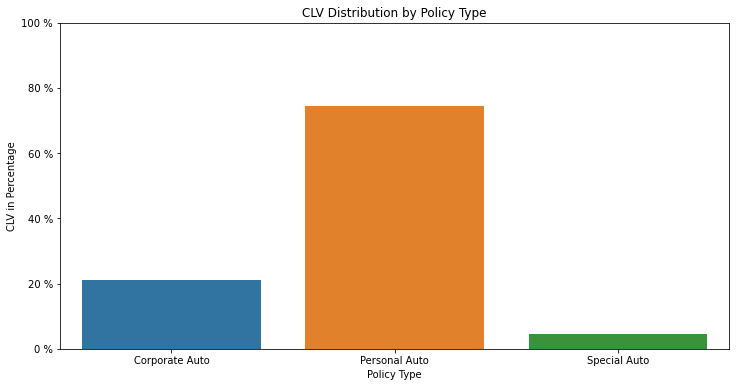

In [26]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Policy Type', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Policy Type')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Policy Type')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## Renew Offer Type

In [27]:
df_agg = df.groupby('Renew Offer Type', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Renew Offer Type,Customer Lifetime Value
0,Offer1,3.266899e+07
1,Offer2,2.164290e+07
2,Offer3,1.145297e+07
3,Offer4,7.352266e+06


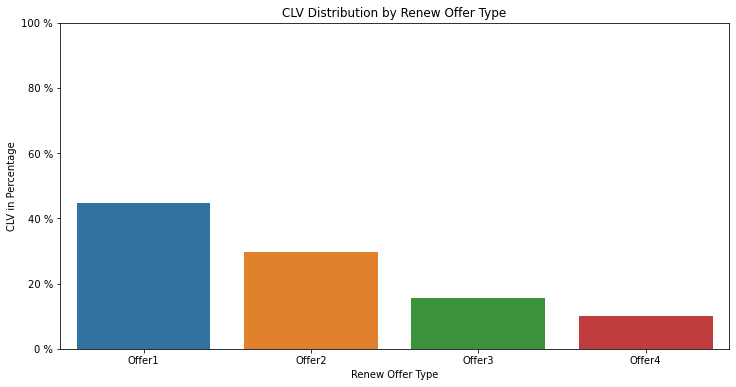

In [28]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Renew Offer Type', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Renew Offer Type')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Renew Offer Type')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()


## Sales Channel 

In [29]:
df_agg = df.groupby('Sales Channel', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Sales Channel,Customer Lifetime Value
0,Agent,2.766896e+07
1,Branch,2.084330e+07
2,Call Center,1.429665e+07
3,Web,1.030822e+07


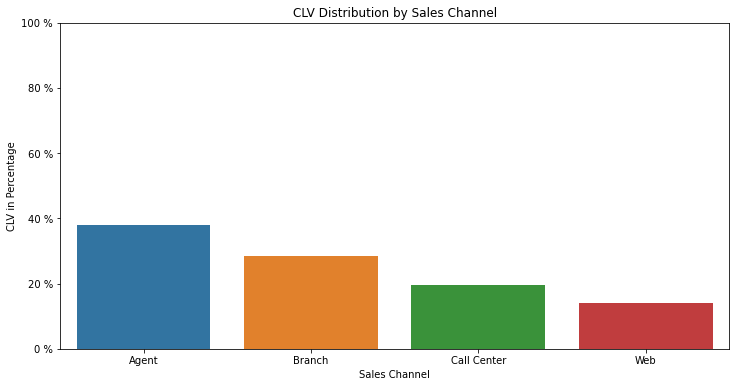

In [30]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Sales Channel', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Sales Channel')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Sales Channel')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## Vehicle Class

In [31]:
df_agg = df.groupby('Vehicle Class', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Vehicle Class,Customer Lifetime Value
0,Four-Door Car,3.064521e+07
1,Luxury Car,2.779696e+06
2,Luxury SUV,3.150632e+06
3,SUV,1.875655e+07
4,Sports Car,5.203479e+06
5,Two-Door Car,1.258156e+07


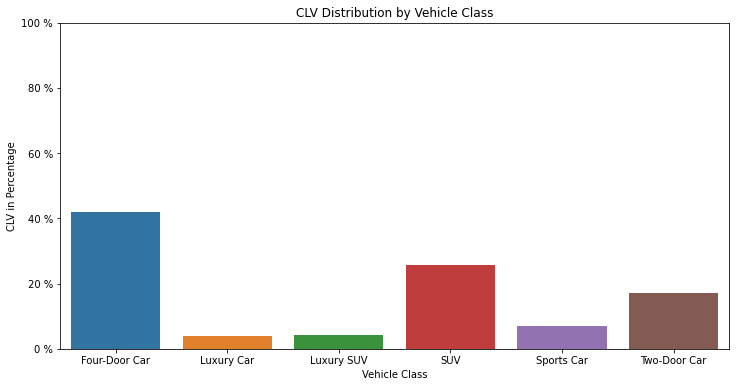

In [32]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum
df_agg['Customer Lifetime Value'][5] = 100 * agg_arr[5] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Vehicle Class', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Vehicle Class')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Vehicle Class')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## State

In [33]:
df_agg = df.groupby('State', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,State,Customer Lifetime Value
0,Arizona,1.338786e+07
1,California,2.521149e+07
2,Nevada,7.106015e+06
3,Oregon,2.101062e+07
4,Washington,6.401135e+06


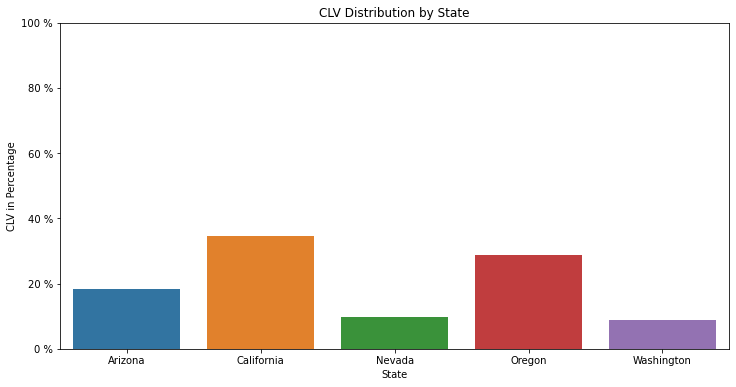

In [34]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum

#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('State')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by State')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

## Policy

In [35]:
df_agg = df.groupby('Policy', as_index=False).agg({"Customer Lifetime Value": "sum"})
df_agg

,Policy,Customer Lifetime Value
0,Corporate L1,3.042499e+06
1,Corporate L2,4.520629e+06
2,Corporate L3,7.815630e+06
3,Personal L1,9.907305e+06
4,Personal L2,1.709252e+07
5,Personal L3,2.748992e+07
6,Special L1,5.499624e+05
7,Special L2,1.365613e+06
8,Special L3,1.333050e+06


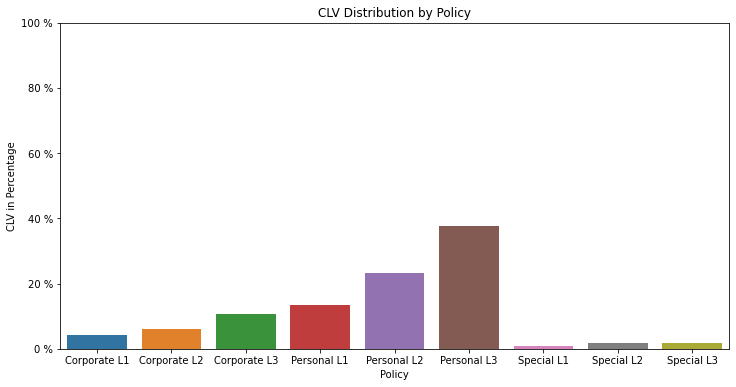

In [36]:
agg_arr_sum = sum(df_agg['Customer Lifetime Value'])
agg_arr = df_agg['Customer Lifetime Value']
percentile_agg_arr = []
df_agg['Customer Lifetime Value'][0] = 100 * agg_arr[0] / agg_arr_sum
df_agg['Customer Lifetime Value'][1] = 100 * agg_arr[1] / agg_arr_sum
df_agg['Customer Lifetime Value'][2] = 100 * agg_arr[2] / agg_arr_sum
df_agg['Customer Lifetime Value'][3] = 100 * agg_arr[3] / agg_arr_sum
df_agg['Customer Lifetime Value'][4] = 100 * agg_arr[4] / agg_arr_sum
df_agg['Customer Lifetime Value'][5] = 100 * agg_arr[5] / agg_arr_sum
df_agg['Customer Lifetime Value'][6] = 100 * agg_arr[6] / agg_arr_sum
df_agg['Customer Lifetime Value'][7] = 100 * agg_arr[7] / agg_arr_sum
df_agg['Customer Lifetime Value'][8] = 100 * agg_arr[8] / agg_arr_sum


#agg_arr_sum
plt.figure(figsize=(12,6))
sns.barplot(x='Policy', y='Customer Lifetime Value', data=df_agg)
plt.xlabel('Policy')
plt.ylabel('CLV in Percentage')
plt.title('CLV Distribution by Policy')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))
plt.show()

In [37]:
df1 = df.copy()

In [38]:
df1.drop(['State','Coverage','Renew Offer Type','Vehicle Class','Response','Gender','Location Code',
          'Vehicle Size','Policy','Policy Type','Sales Channel','Effective To Date'], axis=1, inplace = True)

In [39]:
df_clv = pd.get_dummies(df1,columns=['Marital Status','Number of Policies','Education','EmploymentStatus'],drop_first=True)

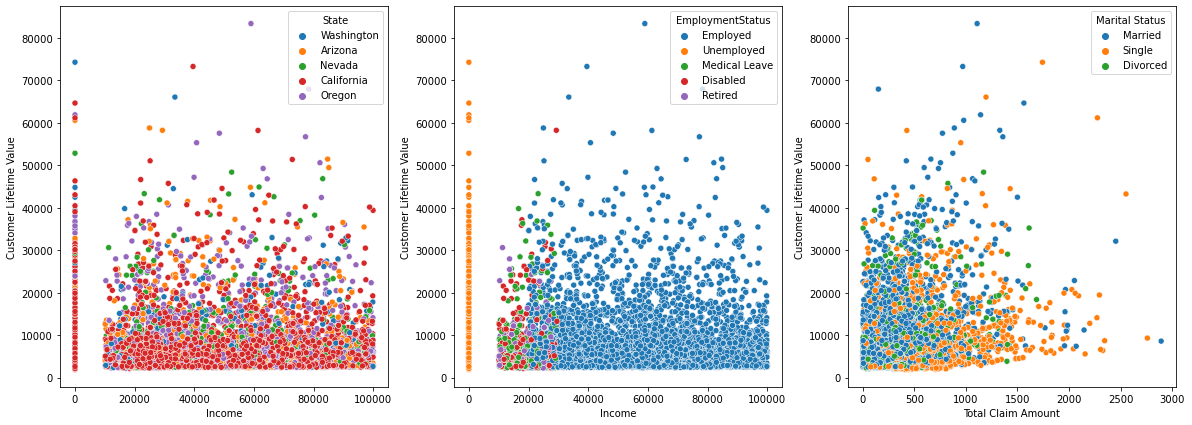

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="State", data=df, ax=axs[0])
sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="EmploymentStatus", data=df, ax=axs[1])
sns.scatterplot(x="Total Claim Amount", y="Customer Lifetime Value", hue="Marital Status", data=df, ax=axs[2])

plt.show()

In [41]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from scipy.stats.mstats import winsorize
from sklearn.metrics import mean_absolute_error

## Model 1

In [43]:
import statsmodels.api as sm

y = df_clv['Customer Lifetime Value']
x = df_clv.drop('Customer Lifetime Value', axis=1)

x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.635
Model:                                 OLS   Adj. R-squared:                  0.634
Method:                      Least Squares   F-statistic:                     660.6
Date:                     Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                             15:35:34   Log-Likelihood:                -89055.
No. Observations:                     9134   AIC:                         1.782e+05
Df Residuals:                         9109   BIC:                         1.783e+05
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4543.9026    293.384    -15.488      0.000   -5119.000   -3968.805
Income                            -0.0002      0.003     -0.088      0.930      -0.005       0.005
Monthly Premium Auto              81.0850      1.738     46.641      0.000      77.677      84.493
Months Since Last Claim            6.5043      4.328      1.503      0.133      -1.980      14.989
Months Since Policy Inception      1.5650      1.563      1.001      0.317      -1.498       4.629
Number of Open Complaints       -171.4796     47.829     -3.585      0.000    -265.236     -77.724
Total Claim Amount                -0.1922      0.226     -0.852      0.394      -0.635       0.250
Marital Status_Married            33.9548    127.290      0.267      0.790    -215.562     283.472
Marital Status_Single           -208.8929    148.459     -1.407      0.159    -499.906      82.121
Number of Policies_2             1.22e+04    113.430    107.571      0.000     1.2e+04    1.24e+04
Number of Policies_3            3614.1517    141.995     25.453      0.000    3335.810    3892.494
Number of Policies_4            3592.7919    218.416     16.449      0.000    3164.648    4020.936
Number of Policies_5            3599.4090    218.827     16.449      0.000    3170.460    4028.358
Number of Policies_6            3614.4880    227.719     15.873      0.000    3168.109    4060.867
Number of Policies_7            3564.7087    213.180     16.722      0.000    3146.829    3982.589
Number of Policies_8            3590.1344    224.509     15.991      0.000    3150.046    4030.223
Number of Policies_9            3608.0914    216.518     16.664      0.000    3183.669    4032.514
Education_College                -56.8570    112.966     -0.503      0.615    -278.296     164.582
Education_Doctor                 245.5808    239.440      1.026      0.305    -223.775     714.937
Education_High School or Below   211.4535    114.114      1.853      0.064     -12.236     435.143
Education_Master                 273.1693    173.209      1.577      0.115     -66.360     612.699
EmploymentStatus_Employed        676.4963    233.008      2.903      0.004     219.749    1133.244
EmploymentStatus_Medical Leave   505.8334    288.155      1.755      0.079     -59.015    1070.682
EmploymentStatus_Retired         -49.2337    323.933     -0.152      0.879    -684.215     585.747
EmploymentStatus_Unemployed       47.3703    235.099      0.201      0.840    -413.477     508.217
==============================================================================
Omnibus:                     7121.729   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239114.806
Skew:              

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.639
Model:                                 OLS   Adj. R-squared:                  0.638
Method:                      Least Squares   F-statistic:                     469.4
Date:                     Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                             15:35:34   Log-Likelihood:                -62327.
No. Observations:                     6393   AIC:                         1.247e+05
Df Residuals:                         6368   BIC:                         1.249e+05
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4508.5567    349.967    -12.883      0.000   -5194.610   -3822.504
Income                            -0.0020      0.003     -0.664      0.507      -0.008       0.004
Monthly Premium Auto              82.3532      2.093     39.355      0.000      78.251      86.455
Months Since Last Claim           11.8336      5.149      2.298      0.022       1.740      21.928
Months Since Policy Inception     -0.1806      1.866     -0.097      0.923      -3.838       3.477
Number of Open Complaints       -121.5448     57.249     -2.123      0.034    -233.773      -9.317
Total Claim Amount                -0.1021      0.273     -0.374      0.708      -0.637       0.433
Marital Status_Married          -129.9185    151.058     -0.860      0.390    -426.042     166.205
Marital Status_Single           -359.7060    176.055     -2.043      0.041    -704.834     -14.578
Number of Policies_2            1.215e+04    135.795     89.497      0.000    1.19e+04    1.24e+04
Number of Policies_3            3577.5087    166.835     21.443      0.000    3250.457    3904.561
Number of Policies_4            3578.0080    259.606     13.782      0.000    3069.093    4086.923
Number of Policies_5            3559.1269    261.452     13.613      0.000    3046.593    4071.661
Number of Policies_6            3585.4073    275.069     13.035      0.000    3046.180    4124.635
Number of Policies_7            3525.2677    263.305     13.389      0.000    3009.102    4041.433
Number of Policies_8            3535.6014    268.515     13.167      0.000    3009.221    4061.981
Number of Policies_9            3565.9148    260.636     13.682      0.000    3054.980    4076.850
Education_College               -117.6237    134.975     -0.871      0.384    -382.221     146.973
Education_Doctor                 218.2273    286.905      0.761      0.447    -344.203     780.657
Education_High School or Below   164.4313    136.402      1.205      0.228    -102.963     431.825
Education_Master                 271.8646    207.144      1.312      0.189    -134.207     677.937
EmploymentStatus_Employed        820.2439    275.321      2.979      0.003     280.523    1359.965
EmploymentStatus_Medical Leave   480.1875    339.966      1.412      0.158    -186.261    1146.636
EmploymentStatus_Retired         -95.1111    384.625     -0.247      0.805    -849.106     658.884
EmploymentStatus_Unemployed      -30.3605    276.994     -0.110      0.913    -573.362     512.641
==============================================================================
Omnibus:                     5178.944   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202062.277
Skew:              

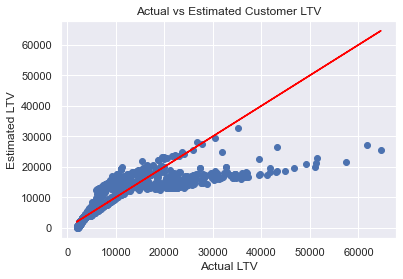

In [45]:
# Model graph to see predictions

X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual LTV")
plt.ylabel("Estimated LTV", )
plt.title("Actual vs Estimated Customer LTV")
plt.show()

In [46]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 2118.64509966808
Mean Sq. Error (MSE)          : 17339210.020718113
Root Mean Sq. Error (RMSE)     : 4164.037706447687
Mean Abs. Perc. Error (MAPE) : 24.116787788262634


In [47]:
clv_score = []
clv_score.append((results.rsquared,
                  mean_absolute_error(y_test, y_pred),
                 mse(y_test, y_pred),rmse(y_test, y_pred),
                 np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
clv_score

[(0.6388768980461503,
  2118.64509966808,
  17339210.020718113,
  4164.037706447687,
  24.116787788262634)]

## Model 2

In [48]:
#duplicate the original data and get the log version of it to be able to reach higher R2(with outliers)

df2 = df_clv.copy()

df2['Monthly Premium Auto'] = np.log(df['Monthly Premium Auto'])
df2['Total Claim Amount'] = np.log(df['Total Claim Amount'])
y = np.log(df2['Customer Lifetime Value'])

import statsmodels.api as sm

X2 =  df2.drop('Customer Lifetime Value',axis=1)

In [49]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X2_train.shape[0]))
print('Test Data Count: {}'.format(X2_test.shape[0]))

X2_train = sm.add_constant(X2_train)
results_log = sm.OLS(y_train, X2_train).fit()
results_log.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.904
Model:                                 OLS   Adj. R-squared:                  0.903
Method:                      Least Squares   F-statistic:                     2485.
Date:                     Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                             15:35:35   Log-Likelihood:                 1108.7
No. Observations:                     6393   AIC:                            -2167.
Df Residuals:                         6368   BIC:                            -1998.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6559      0.041     89.893      0.000       3.576       3.736
Income                          1.296e-07   1.48e-07      0.876      0.381    -1.6e-07     4.2e-07
Monthly Premium Auto               0.9849      0.009    108.104      0.000       0.967       1.003
Months Since Last Claim            0.0007      0.000      2.801      0.005       0.000       0.001
Months Since Policy Inception     -0.0001   9.15e-05     -1.631      0.103      -0.000    3.01e-05
Number of Open Complaints         -0.0189      0.003     -6.733      0.000      -0.024      -0.013
Total Claim Amount                 0.0021      0.003      0.615      0.538      -0.004       0.009
Marital Status_Married             0.0032      0.007      0.427      0.670      -0.011       0.018
Marital Status_Single             -0.0353      0.009     -4.106      0.000      -0.052      -0.018
Number of Policies_2               1.3993      0.007    210.090      0.000       1.386       1.412
Number of Policies_3               0.6928      0.008     84.672      0.000       0.677       0.709
Number of Policies_4               0.6936      0.013     54.475      0.000       0.669       0.719
Number of Policies_5               0.6908      0.013     53.869      0.000       0.666       0.716
Number of Policies_6               0.6949      0.013     51.504      0.000       0.668       0.721
Number of Policies_7               0.6886      0.013     53.310      0.000       0.663       0.714
Number of Policies_8               0.6934      0.013     52.646      0.000       0.668       0.719
Number of Policies_9               0.6929      0.013     54.202      0.000       0.668       0.718
Education_College                 -0.0032      0.007     -0.478      0.633      -0.016       0.010
Education_Doctor                   0.0209      0.014      1.488      0.137      -0.007       0.049
Education_High School or Below     0.0122      0.007      1.820      0.069      -0.001       0.025
Education_Master                   0.0299      0.010      2.948      0.003       0.010       0.050
EmploymentStatus_Employed          0.0735      0.013      5.446      0.000       0.047       0.100
EmploymentStatus_Medical Leave     0.0261      0.017      1.565      0.118      -0.007       0.059
EmploymentStatus_Retired          -0.0027      0.019     -0.142      0.887      -0.040       0.034
EmploymentStatus_Unemployed       -0.0164      0.014     -1.205      0.228      -0.043       0.010
==============================================================================
Omnibus:                     2216.000   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9659.994
Skew:              

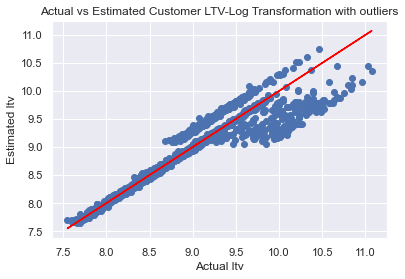

In [50]:
# Model graph to see predictions

X2_test = sm.add_constant(X2_test)

y_pred = results_log.predict(X2_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Log Transformation with outliers")
plt.show()

In [51]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.10542046435641594
Mean Sq. Error (MSE)          : 0.04296206530501462
Root Mean Sq. Error (RMSE)     : 0.20727292467906805
Mean Abs. Perc. Error (MAPE) : 1.1131046325131708


In [52]:
exp_ypred = np.exp(y_pred)
exp_ytest = np.exp(y_test)

In [53]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(exp_ytest, exp_ypred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(exp_ytest, exp_ypred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(exp_ytest, exp_ypred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))

Mean Absolute Error (MAE)        : 1544.4166196094295
Mean Sq. Error (MSE)          : 15384158.11896583
Root Mean Sq. Error (RMSE)     : 3922.264412168796
Mean Abs. Perc. Error (MAPE) : 10.140395739204058


In [54]:
clv_score.append((results.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypred),
                 mse(exp_ytest, exp_ypred),rmse(exp_ytest, exp_ypred),
                 np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))
clv_score

[(0.6388768980461503,
  2118.64509966808,
  17339210.020718113,
  4164.037706447687,
  24.116787788262634),
 (0.6388768980461503,
  1544.4166196094295,
  15384158.11896583,
  3922.264412168796,
  10.140395739204058)]

In [55]:
#duplicate the original data and winsorize the data at %5
df3 = df_clv.copy()

df3['Monthly Premium Auto'] = winsorize(df3['Monthly Premium Auto'],(0, 0.05))
df3['Total Claim Amount'] = winsorize(df3['Total Claim Amount'],(0, 0.05))

y = df3['Customer Lifetime Value']
X3 =  df3.drop('Customer Lifetime Value',axis=1)

In [56]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X3_train.shape[0]))
print('Test Data Count: {}'.format(X3_test.shape[0]))


X3_train = sm.add_constant(X3_train)
results_wins = sm.OLS(y_train, X3_train).fit()
results_wins.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.628
Model:                                 OLS   Adj. R-squared:                  0.626
Method:                      Least Squares   F-statistic:                     447.1
Date:                     Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                             15:35:35   Log-Likelihood:                -62426.
No. Observations:                     6393   AIC:                         1.249e+05
Df Residuals:                         6368   BIC:                         1.251e+05
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5897.8233    370.015    -15.939      0.000   -6623.177   -5172.469
Income                            -0.0018      0.003     -0.589      0.556      -0.008       0.004
Monthly Premium Auto              95.5297      2.470     38.680      0.000      90.688     100.371
Months Since Last Claim           13.4454      5.230      2.571      0.010       3.193      23.698
Months Since Policy Inception      0.4268      1.895      0.225      0.822      -3.288       4.142
Number of Open Complaints       -123.3277     58.140     -2.121      0.034    -237.302      -9.354
Total Claim Amount                 0.5292      0.315      1.682      0.093      -0.087       1.146
Marital Status_Married          -113.0746    153.391     -0.737      0.461    -413.772     187.623
Marital Status_Single           -345.0125    178.699     -1.931      0.054    -695.322       5.297
Number of Policies_2            1.214e+04    137.908     87.996      0.000    1.19e+04    1.24e+04
Number of Policies_3            3512.0779    169.411     20.731      0.000    3179.975    3844.181
Number of Policies_4            3537.0549    263.630     13.417      0.000    3020.251    4053.858
Number of Policies_5            3570.0332    265.536     13.445      0.000    3049.493    4090.574
Number of Policies_6            3539.5004    279.340     12.671      0.000    2991.900    4087.101
Number of Policies_7            3616.4937    267.418     13.524      0.000    3092.264    4140.723
Number of Policies_8            3501.7776    272.716     12.840      0.000    2967.162    4036.393
Number of Policies_9            3537.4811    264.695     13.364      0.000    3018.590    4056.372
Education_College               -117.4437    137.091     -0.857      0.392    -386.188     151.301
Education_Doctor                 247.4574    291.367      0.849      0.396    -323.721     818.635
Education_High School or Below   144.8087    138.565      1.045      0.296    -126.825     416.442
Education_Master                 296.2651    210.407      1.408      0.159    -116.203     708.734
EmploymentStatus_Employed        910.5204    279.538      3.257      0.001     362.532    1458.509
EmploymentStatus_Medical Leave   442.9474    345.246      1.283      0.200    -233.852    1119.746
EmploymentStatus_Retired         -17.2487    390.716     -0.044      0.965    -783.183     748.685
EmploymentStatus_Unemployed     -116.7310    281.186     -0.415      0.678    -667.951     434.489
==============================================================================
Omnibus:                     5336.144   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237622.422
Skew:              

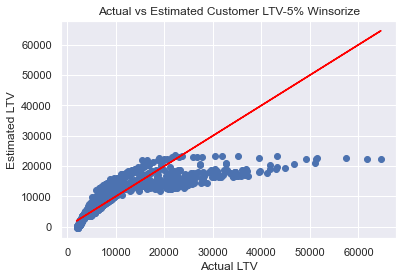

In [57]:
# Model graph to see predictions
X3_test = sm.add_constant(X3_test)

y_pred = results_wins.predict(X3_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual LTV")
plt.ylabel("Estimated LTV", )
plt.title("Actual vs Estimated Customer LTV-5% Winsorize")
plt.show()

In [58]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 2283.3726653362933
Mean Sq. Error (MSE)          : 17418677.453130685
Root Mean Sq. Error (RMSE)     : 4173.56891079214
Mean Abs. Perc. Error (MAPE) : 27.57607081478807


In [59]:
clv_score.append((results_wins.rsquared,
                  mean_absolute_error(y_test, y_pred),
                 mse(y_test, y_pred),rmse(y_test, y_pred),
                 np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
clv_score

[(0.6388768980461503,
  2118.64509966808,
  17339210.020718113,
  4164.037706447687,
  24.116787788262634),
 (0.6388768980461503,
  1544.4166196094295,
  15384158.11896583,
  3922.264412168796,
  10.140395739204058),
 (0.6275527712096544,
  2283.3726653362933,
  17418677.453130685,
  4173.56891079214,
  27.57607081478807)]

## Model 4

In [60]:
#duplicate the original data and take log of the data without outlier

df4 = df3.copy()

df4['Monthly Premium Auto'] = np.log(df4['Monthly Premium Auto'])
df4['Total Claim Amount'] = np.log(df4['Total Claim Amount'])

y = np.log(df4['Customer Lifetime Value'])
X4 =df4.drop('Customer Lifetime Value',axis=1)

In [61]:
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(X4_train.shape[0]))
print('Test Data Count: {}'.format(X4_test.shape[0]))

X4_train = sm.add_constant(X4_train)
results_logwins = sm.OLS(y_train, X4_train).fit()
results_logwins.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.898
Model:                                 OLS   Adj. R-squared:                  0.898
Method:                      Least Squares   F-statistic:                     2333.
Date:                     Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                             15:35:35   Log-Likelihood:                 927.69
No. Observations:                     6393   AIC:                            -1805.
Df Residuals:                         6368   BIC:                            -1636.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.2942      0.045     72.829      0.000       3.206       3.383
Income                          8.808e-08   1.52e-07      0.579      0.563    -2.1e-07    3.86e-07
Monthly Premium Auto               1.0631      0.010    104.839      0.000       1.043       1.083
Months Since Last Claim            0.0008      0.000      3.026      0.002       0.000       0.001
Months Since Policy Inception     -0.0001   9.41e-05     -1.163      0.245      -0.000    7.51e-05
Number of Open Complaints         -0.0191      0.003     -6.614      0.000      -0.025      -0.013
Total Claim Amount                 0.0054      0.003      1.573      0.116      -0.001       0.012
Marital Status_Married             0.0042      0.008      0.553      0.580      -0.011       0.019
Marital Status_Single             -0.0318      0.009     -3.599      0.000      -0.049      -0.014
Number of Policies_2               1.3981      0.007    204.055      0.000       1.385       1.412
Number of Policies_3               0.6886      0.008     81.810      0.000       0.672       0.705
Number of Policies_4               0.6905      0.013     52.716      0.000       0.665       0.716
Number of Policies_5               0.6920      0.013     52.455      0.000       0.666       0.718
Number of Policies_6               0.6918      0.014     49.838      0.000       0.665       0.719
Number of Policies_7               0.6945      0.013     52.266      0.000       0.668       0.721
Number of Policies_8               0.6919      0.014     51.067      0.000       0.665       0.718
Number of Policies_9               0.6907      0.013     52.520      0.000       0.665       0.716
Education_College                 -0.0035      0.007     -0.515      0.606      -0.017       0.010
Education_Doctor                   0.0204      0.014      1.406      0.160      -0.008       0.049
Education_High School or Below     0.0119      0.007      1.735      0.083      -0.002       0.025
Education_Master                   0.0307      0.010      2.943      0.003       0.010       0.051
EmploymentStatus_Employed          0.0774      0.014      5.574      0.000       0.050       0.105
EmploymentStatus_Medical Leave     0.0223      0.017      1.297      0.195      -0.011       0.056
EmploymentStatus_Retired          -0.0002      0.019     -0.009      0.993      -0.038       0.038
EmploymentStatus_Unemployed       -0.0215      0.014     -1.537      0.124      -0.049       0.006
==============================================================================
Omnibus:                     2077.394   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8160.440
Skew:              

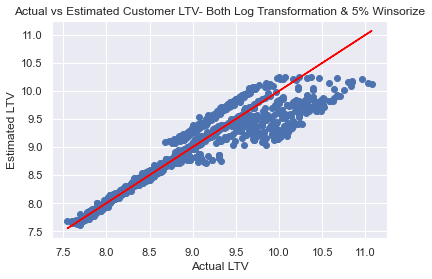

In [62]:
# Model graph to see predictions

X4_test = sm.add_constant(X4_test)

y_pred = results_logwins.predict(X4_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual LTV")
plt.ylabel("Estimated LTV", )
plt.title("Actual vs Estimated Customer LTV- Both Log Transformation & 5% Winsorize")
plt.show()

In [63]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.11608304470954144
Mean Sq. Error (MSE)          : 0.04535441044588905
Root Mean Sq. Error (RMSE)     : 0.21296574946664323
Mean Abs. Perc. Error (MAPE) : 1.2308677829703523


In [64]:
exp_ypred = np.exp(y_pred)
exp_ytest = np.exp(y_test)

clv_score.append((results_logwins.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypred),
                 mse(exp_ytest, exp_ypred),rmse(exp_ytest, exp_ypred),
                 np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))
clv_score

[(0.6388768980461503,
  2118.64509966808,
  17339210.020718113,
  4164.037706447687,
  24.116787788262634),
 (0.6388768980461503,
  1544.4166196094295,
  15384158.11896583,
  3922.264412168796,
  10.140395739204058),
 (0.6275527712096544,
  2283.3726653362933,
  17418677.453130685,
  4173.56891079214,
  27.57607081478807),
 (0.8979026686051422,
  1641.6327390572903,
  15678528.855843576,
  3959.612210285696,
  11.175814676742483)]

## Model 5

In [65]:
#the best model is the one with log transformation and outliers included
#Let's use polynomial features to see if we can do better

from sklearn.preprocessing import PolynomialFeatures
y = np.log(df2['Customer Lifetime Value'])
X5 =df2.drop('Customer Lifetime Value',axis=1)

pol = PolynomialFeatures()

array = pol.fit_transform(X5)

df_pol = pd.DataFrame(array)
df_pol.columns = pol.get_feature_names(X5.columns)
df_pol

,1,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Marital Status_Married,Marital Status_Single,Number of Policies_2,...,EmploymentStatus_Employed^2,EmploymentStatus_Employed EmploymentStatus_Medical Leave,EmploymentStatus_Employed EmploymentStatus_Retired,EmploymentStatus_Employed EmploymentStatus_Unemployed,EmploymentStatus_Medical Leave^2,EmploymentStatus_Medical Leave EmploymentStatus_Retired,EmploymentStatus_Medical Leave EmploymentStatus_Unemployed,EmploymentStatus_Retired^2,EmploymentStatus_Retired EmploymentStatus_Unemployed,EmploymentStatus_Unemployed^2
0,1.0,56274.0,4.234107,32.0,5.0,0.0,5.952753,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,4.543295,13.0,42.0,0.0,7.031268,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,48767.0,4.682131,18.0,38.0,0.0,6.339428,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,4.663439,18.0,65.0,0.0,6.272653,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,43836.0,4.290459,12.0,44.0,0.0,4.928202,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,71941.0,4.290459,18.0,89.0,0.0,5.289452,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,21604.0,4.369448,14.0,28.0,0.0,5.938064,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,4.442651,9.0,37.0,3.0,6.673026,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9132,1.0,21941.0,4.564348,34.0,3.0,0.0,6.538429,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(df_pol_train.shape[0]))
print('Test Data Count: {}'.format(df_pol_test.shape[0]))

df_pol_train = sm.add_constant(df_pol_train)
results_pol = sm.OLS(y_train, df_pol_train).fit()
results_pol.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.908
Model:                                 OLS   Adj. R-squared:                  0.904
Method:                      Least Squares   F-statistic:                     229.6
Date:                     Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                             15:35:36   Log-Likelihood:                 1267.6
No. Observations:                     6393   AIC:                            -2005.
Df Residuals:                         6128   BIC:                            -213.0
Df Model:                              264                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 3.1066      0.510      6.094      0.000       2.107       4.106
Income                                                         3.223e-06   3.36e-06      0.959      0.338   -3.37e-06    9.82e-06
Monthly Premium Auto                                              1.2094      0.209      5.780      0.000       0.799       1.620
Months Since Last Claim                                          -0.0060      0.004     -1.433      0.152      -0.014       0.002
Months Since Policy Inception                                    -0.0001      0.002     -0.069      0.945      -0.003       0.003
Number of Open Complaints                                        -0.0616      0.051     -1.211      0.226      -0.161       0.038
Total Claim Amount                                               -0.0506      0.059     -0.850      0.395      -0.167       0.066
Marital Status_Married                                            0.0751      0.061      1.231      0.218      -0.045       0.195
Marital Status_Single                                             0.0368      0.073      0.505      0.614      -0.106       0.180
Number of Policies_2                                              0.7495      0.053     14.171      0.000       0.646       0.853
Number of Policies_3                                              0.3435      0.068      5.052      0.000       0.210       0.477
Number of Policies_4                                              0.3262      0.112      2.909      0.004       0.106       0.546
Number of Policies_5                                              0.3420      0.105      3.251      0.001       0.136       0.548
Number of Policies_6                                              0.3243      0.115      2.808      0.005       0.098       0.551
Number of Policies_7                                              0.3487      0.120      2.893      0.004       0.112       0.585
Number of Policies_8                                              0.3218      0.121      2.670      0.008       0.086       0.558
Number of Policies_9                                              0.3696      0.108      3.415      0.001       0.157       0.582
Education_College                                                 0.0182      0.054      0.334      0.738      -0.088       0.125
Education_Doctor                                                 -0.0479      0.120     -0.400      0.689      -0.282       0.187
Education_High School or Below                                    0.0337      0.055      0.617      0.537      -0.073       0.141
Education_Master                      

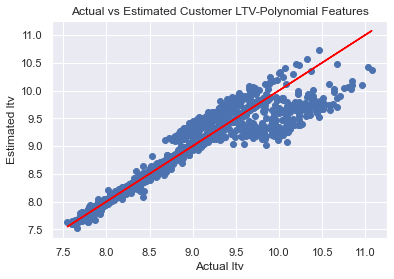

In [67]:
df_pol_test = sm.add_constant(df_pol_test)

y_pred = results_pol.predict(df_pol_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features")
plt.show()

In [68]:
print("Mean Absolute Error (MAE)     : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)    : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE)  : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)     : 0.11042255157706268
Mean Sq. Error (MSE)          : 0.04375512616477542
Root Mean Sq. Error (RMSE)    : 0.2091772601521863
Mean Abs. Perc. Error (MAPE)  : 1.1736573609415526


In [69]:
exp_ypred = np.exp(y_pred)
exp_ytest = np.exp(y_test)

clv_score.append((results_pol.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypred),
                 mse(exp_ytest, exp_ypred),rmse(exp_ytest, exp_ypred),
                 np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))

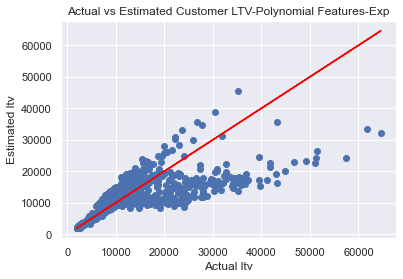

In [70]:
# Model graph to see exponential version of predictions

df_pol_test = sm.add_constant(df_pol_test)

y_pred = np.exp(results_pol.predict(df_pol_test))
sns.set(color_codes=True)
plt.scatter(exp_ytest, y_pred)
plt.plot(exp_ytest, exp_ytest, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features-Exp")
plt.show()

## Model 6

In [71]:
significant_features = list(results_pol.pvalues[results_pol.pvalues <= 0.05].index)

In [72]:
df_sig_train, df_sig_test, y_train, y_test = train_test_split(df_pol[significant_features], y, test_size = 0.30, random_state = 450)

print('Train Data Count: {}'.format(df_sig_train.shape[0]))
print('Test Data Count: {}'.format(df_sig_test.shape[0]))

df_sig_train = sm.add_constant(df_sig_train)
results_sig = sm.OLS(y_train, df_sig_train).fit()
results_sig.summary()

Train Data Count: 6393
Test Data Count: 2741


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.904
Model:                                 OLS   Adj. R-squared:                  0.904
Method:                      Least Squares   F-statistic:                     1581.
Date:                     Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                             15:35:36   Log-Likelihood:                 1136.7
No. Observations:                     6393   AIC:                            -2195.
Df Residuals:                         6354   BIC:                            -1932.
Df Model:                               38                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 3.6736      0.039     95.031      0.000       3.598       3.749
Monthly Premium Auto                                              0.9952      0.009    114.512      0.000       0.978       1.012
Number of Policies_2                                              0.6776      0.013     51.138      0.000       0.652       0.704
Number of Policies_3                                              0.3457      0.004     84.687      0.000       0.338       0.354
Number of Policies_4                                              0.3485      0.006     54.698      0.000       0.336       0.361
Number of Policies_5                                              0.3444      0.006     53.877      0.000       0.332       0.357
Number of Policies_6                                              0.3454      0.007     51.343      0.000       0.332       0.359
Number of Policies_7                                              0.3455      0.006     53.680      0.000       0.333       0.358
Number of Policies_8                                              0.3469      0.007     52.863      0.000       0.334       0.360
Number of Policies_9                                              0.3478      0.006     54.517      0.000       0.335       0.360
EmploymentStatus_Medical Leave                                    0.2525      0.101      2.491      0.013       0.054       0.451
Income Months Since Last Claim                                 2.513e-08   6.51e-09      3.857      0.000    1.24e-08    3.79e-08
Income Number of Policies_2                                   -1.002e-06   3.08e-07     -3.252      0.001   -1.61e-06   -3.98e-07
Monthly Premium Auto EmploymentStatus_Medical Leave              -0.1002      0.045     -2.222      0.026      -0.189      -0.012
Monthly Premium Auto EmploymentStatus_Unemployed                 -0.0427      0.014     -3.103      0.002      -0.070      -0.016
Months Since Last Claim^2                                     -4.301e-06   1.21e-05     -0.355      0.723   -2.81e-05    1.95e-05
Months Since Last Claim Marital Status_Married                   -0.0009      0.000     -1.919      0.055      -0.002    2.01e-05
Months Since Last Claim Number of Policies_2                      0.0026      0.001      4.367      0.000       0.001       0.004
Months Since Policy Inception Marital Status_Married          -4.458e-05      0.000     -0.349      0.727      -0.000       0.000
Months Since Policy Inception Number of Policies_2               -0.0005      0.000     -2.343      0.019      -0.001   -7.47e-05
Months Since Policy Inception Employme

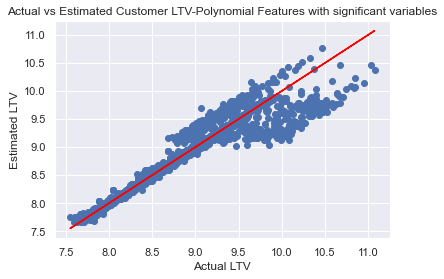

In [73]:
# Model graph to see predictions

df_sig_test = sm.add_constant(df_sig_test)

y_pred = results_sig.predict(df_sig_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual LTV")
plt.ylabel("Estimated LTV" )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features with significant variables")
plt.show()

In [74]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_pred)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_pred)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.11025343636484407
Mean Sq. Error (MSE)          : 0.04436955921435218
Root Mean Sq. Error (RMSE)     : 0.2106408298843132
Mean Abs. Perc. Error (MAPE) : 1.1696187307844577


In [75]:
exp_ypred = np.exp(y_pred)
exp_ytest = np.exp(y_test)

clv_score.append((results_sig.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypred),
                 mse(exp_ytest, exp_ypred),rmse(exp_ytest, exp_ypred),
                 np.mean(np.abs((exp_ytest - exp_ypred) / exp_ytest)) * 100))

## Comparision

In [76]:
df_clvscore = pd.DataFrame(clv_score)
df_clvscore.index = ['Standard','Log with outliers','Without Outliers','Log without outliers',
                       'Polynomial Features',
                       'Polynomial with significant features']

df_clvscore.columns = ['R2', 'MAE', 'MSE','RMSE','MAPE']
df_clvscore

,R2,MAE,MSE,RMSE,MAPE
Standard,0.638877,2118.645100,1.733921e+07,4164.037706,24.116788
Log with outliers,0.638877,1544.416620,1.538416e+07,3922.264412,10.140396
Without Outliers,0.627553,2283.372665,1.741868e+07,4173.568911,27.576071
Log without outliers,0.897903,1641.632739,1.567853e+07,3959.612210,11.175815
Polynomial Features,0.908202,1562.199470,1.546722e+07,3932.838127,10.652134
Polynomial with significant features,0.904366,1575.204845,1.557906e+07,3947.032093,10.642366


## Final Linear Model

In [77]:
lrm = LinearRegression()
lrm.fit(df_pol_train, y_train)

y_train_predict = lrm.predict(df_pol_train)
y_test_predict = lrm.predict(df_pol_test)

print("Train observation number  : {}".format(df_pol_train.shape[0]))
print("Test observation number   : {}".format(df_pol_test.shape[0]), "\n")

print("Train R-Square  : {}".format(lrm.score(df_pol_train, y_train)))
print("-----Test Scores---")
print("Test R-Square   : {}".format(lrm.score(df_pol_test, y_test)))
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_test_predict)))
print("Mean squared error (MSE)              : {}".format(mse(y_test, y_test_predict)))
print("Root mean squared error(RMSE)         : {}".format(rmse(y_test, y_test_predict)))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100))

Train observation number  : 6393
Test observation number   : 2741 

Train R-Square  : 0.9082023042618826
-----Test Scores---
Test R-Square   : 0.8957578503218275
Mean_absolute_error (MAE)             : 0.11042260070759266
Mean squared error (MSE)              : 0.043755125814399644
Root mean squared error(RMSE)         : 0.20917725931467704
Mean absolute percentage error (MAPE) : 1.173657939852497


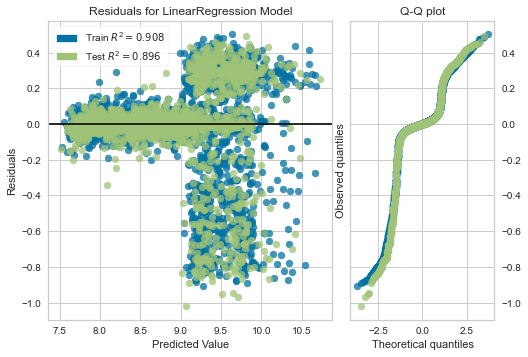

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [78]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lrm, hist = False, qqplot = True)
visualizer.fit(df_pol_train, y_train)  
visualizer.score(df_pol_test, y_test)  
visualizer.show()                 

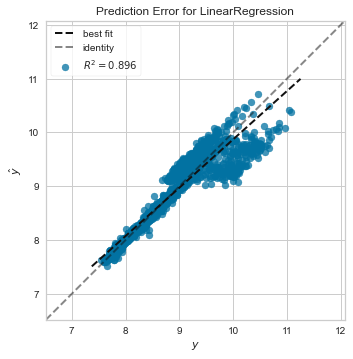

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [79]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lrm)
visualizer.fit(df_pol_train, y_train)  
visualizer.score(df_pol_test, y_test)  
visualizer.show()  

## Lasso

In [80]:
from sklearn.linear_model import Lasso

las = Lasso()
las.fit(df_pol_train, y_train)

y_train_predict = las.predict(df_pol_train)
y_test_predict = las.predict(df_pol_test)

print("Train observation number  : {}".format(df_pol_train.shape[0]))
print("Test observation number   : {}".format(df_pol_test.shape[0]), "\n")

print("Train R-Square  : {}".format(las.score(df_pol_train, y_train)))
print("-----Test Scores---")
print("Test R-Square   : {}".format(las.score(df_pol_test, y_test)))
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_test_predict)))
print("Mean squared error (MSE)              : {}".format(mse(y_test, y_test_predict)))
print("Root mean squared error(RMSE)         : {}".format(rmse(y_test, y_test_predict)))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100))

Train observation number  : 6393
Test observation number   : 2741 

Train R-Square  : 0.6376945906391323
-----Test Scores---
Test R-Square   : 0.6431832618346315
Mean_absolute_error (MAE)             : 0.27336262577008663
Mean squared error (MSE)              : 0.14977205784138348
Root mean squared error(RMSE)         : 0.38700395067929666
Mean absolute percentage error (MAPE) : 3.088272879143229


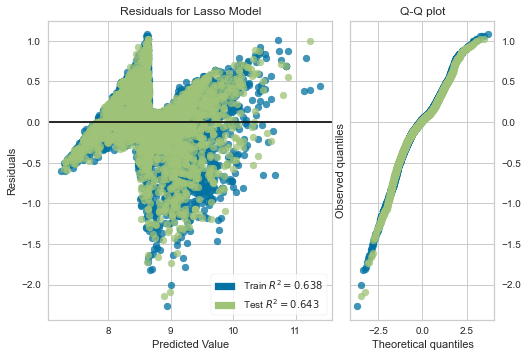

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [81]:
visualizer = ResidualsPlot(las, hist = False, qqplot = True)
visualizer.fit(df_pol_train, y_train)  
visualizer.score(df_pol_test, y_test)  
visualizer.show()   

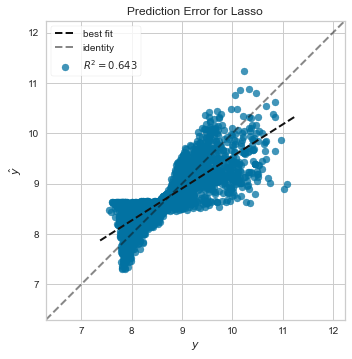

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [82]:
visualizer = PredictionError(las)
visualizer.fit(df_pol_train, y_train)  
visualizer.score(df_pol_test, y_test)  
visualizer.show()  

## Ridge

In [83]:
from sklearn.linear_model import Ridge

rid = Ridge()
rid.fit(df_pol_train, y_train)

y_train_predict = rid.predict(df_pol_train)
y_test_predict = rid.predict(df_pol_test)

print("Train observation number  : {}".format(df_pol_train.shape[0]))
print("Test observation number   : {}".format(df_pol_test.shape[0]), "\n")

print("Train R-Square  : {}".format(rid.score(df_pol_train, y_train)))
print("-----Test Scores---")
print("Test R-Square   : {}".format(rid.score(df_pol_test, y_test)))
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_test_predict)))
print("Mean squared error (MSE)              : {}".format(mse(y_test, y_test_predict)))
print("Root mean squared error(RMSE)         : {}".format(rmse(y_test, y_test_predict)))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100))

Train observation number  : 6393
Test observation number   : 2741 

Train R-Square  : 0.9078053489379165
-----Test Scores---
Test R-Square   : 0.8958126885713228
Mean_absolute_error (MAE)             : 0.11153302126067452
Mean squared error (MSE)              : 0.04373210773089394
Root mean squared error(RMSE)         : 0.209122231555839
Mean absolute percentage error (MAPE) : 1.1862685333078506


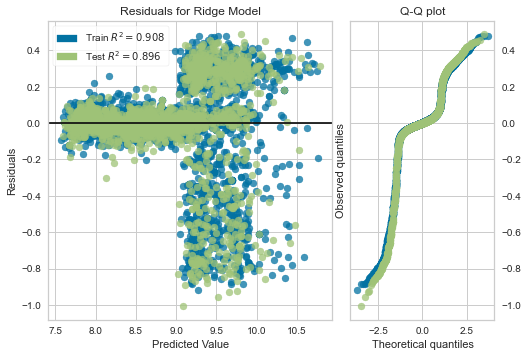

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [84]:
visualizer = ResidualsPlot(rid, hist = False, qqplot = True)
visualizer.fit(df_pol_train, y_train)  
visualizer.score(df_pol_test, y_test)  
visualizer.show()  

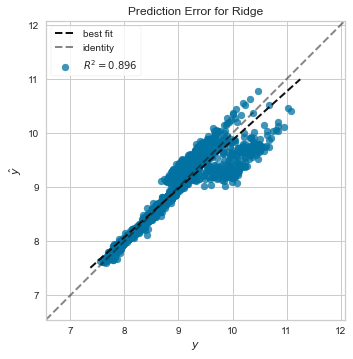

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [85]:
visualizer = PredictionError(rid)
visualizer.fit(df_pol_train, y_train)  
visualizer.score(df_pol_test, y_test)  
visualizer.show()  